
# What is Normal Behaviour?
# Anomaly Detection for Software Vulnerabilities 
## An approach to evaluate a data set if it represents normal behaviour


# TODO:
Different Algorithms, Grid search, try training with test data 

LSTM, Time Series Data 
Anomaly scoring plotten und verhalten bewerten
notes Arbeitslaptop
Bewertung über knowledge of exploits und der Nummer die der Isolation Forest erkennt ? Confusion Matrix!

TODO: CODE aufräumen + Notebooks, Evaluation Methoden Integrieren (Brier Score), Mehrre Models + Datensets, LOCAL OUTLIER DETECTION


### Idea
Feed with dostributions to detect anomal behaviour, What is normal behaviour - from a statistical ppoint of view 
adapating the threshold, if a certain threshold is reached the data doesn't follow normal distribution








## Explorative Data Analysis

### Meta Information


In [1]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.dates as mdates

from helpers import *
from predict import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve, auc, brier_score_loss


from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

In [2]:
# Load Data
train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/train.pkl")
test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/test.pkl")
validation = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/validation.pkl")

In [3]:
print(train.shape)
print(test.shape)
print(validation.shape)

(9564, 14)
(39927, 14)
(2603, 14)


### Distributions

Text(0.5, 1.0, 'Memory Usage Distribution Train Data')

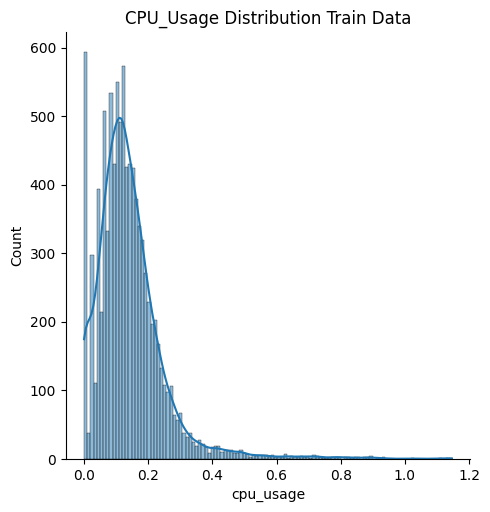

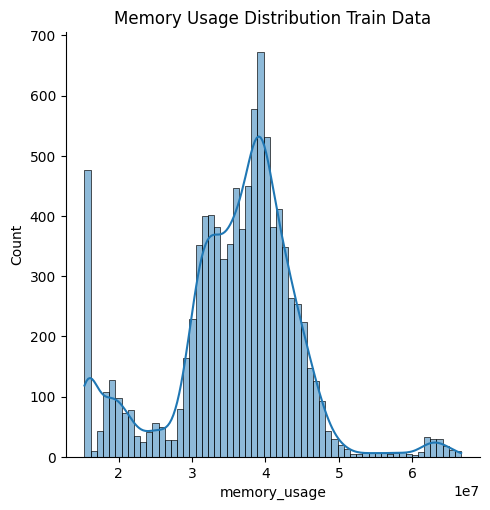

In [4]:
# Distribution Plot Train Data 
sns.displot(data=train, x='cpu_usage', kde=True)
plt.title('CPU_Usage Distribution Train Data')
sns.displot(data=train, x='memory_usage', kde=True)
plt.title('Memory Usage Distribution Train Data')

In [5]:
# Statistical Table
train.describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000
mean,0.141092,3.586510e+07,4084.739753,16489.362087,67.238812,154.606441
std,0.107538,8.686077e+06,3197.226831,29075.417379,4265.001791,1107.688249
min,0.000277,1.531904e+07,0.000000,0.000000,0.000000,0.000000
25%,0.076871,3.189555e+07,2091.000000,6932.000000,0.000000,0.000000
50%,0.123746,3.720806e+07,3485.000000,11631.000000,0.000000,0.000000
75%,0.181755,4.089446e+07,5227.000000,18469.000000,0.000000,0.000000
max,1.146535,6.668288e+07,28425.000000,354543.000000,356352.000000,20480.000000


In [6]:
test.describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,39927.000000,3.992700e+04,39927.000000,39927.000000,3.992700e+04,3.992700e+04
mean,0.141173,3.568852e+07,4121.127733,16244.512260,3.506431e+02,2.255893e+02
std,0.111868,8.876811e+06,3479.540021,29279.070981,1.623316e+04,1.177772e+04
min,0.000129,1.361920e+07,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.071625,3.198566e+07,2090.000000,5374.500000,0.000000e+00,0.000000e+00
50%,0.125114,3.719578e+07,3485.000000,11593.000000,0.000000e+00,0.000000e+00
75%,0.184521,4.099277e+07,5395.000000,18557.500000,0.000000e+00,0.000000e+00
max,2.314982,7.683277e+07,35819.000000,614079.000000,1.503232e+06,2.342912e+06


Text(0.5, 1.0, 'Distribution Plot Memory Usage Test Data  ')

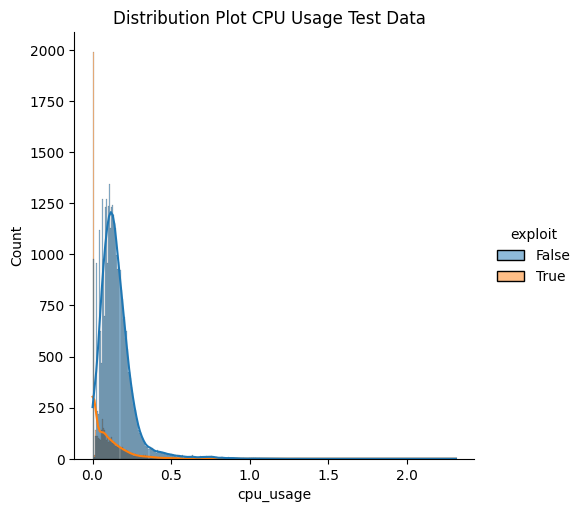

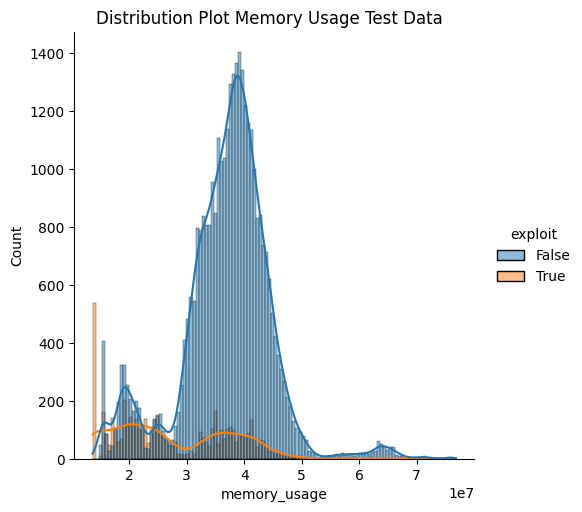

In [7]:
sns.displot(data=test, x='cpu_usage', hue='exploit', kde=True)
plt.title("Distribution Plot CPU Usage Test Data  ")
sns.displot(data=test, x='memory_usage', hue='exploit', kde=True)
plt.title("Distribution Plot Memory Usage Test Data  ")

### Correlation

Text(0.5, 1.0, 'Correlation between Features in Test Data')

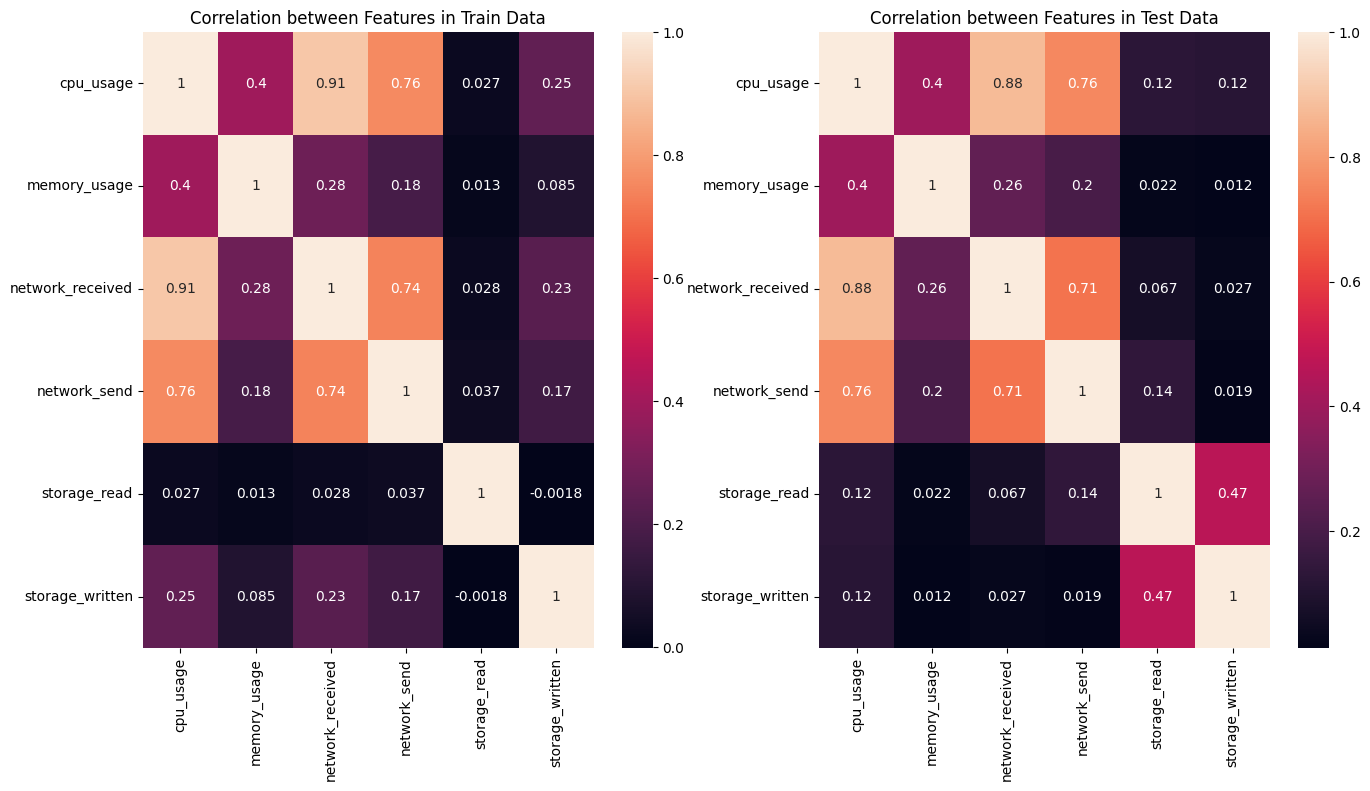

In [5]:
# Correlation of all features -> Scaling after does not make a difference
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.heatmap(train.corr(), annot=True)
plt.title("Correlation between Features in Train Data")
plt.subplot(1, 2, 2)
sns.heatmap(test.corr(), annot=True)
plt.title("Correlation between Features in Test Data")

### Time Series Data 

#### PACF and ACF

### Model1: IsolationForest

In [3]:
# Split and encode Data for modelling and evaluation
validation = encode(validation)
test = encode(test)
train = encode(train)
y_true_train = create_y_values(train)
y_true_test = create_y_values(test)
y_true_validation = create_y_values(validation)
X_train = select_columns_for_modelling(train)
X_test = select_columns_for_modelling(test)
X_validation = select_columns_for_modelling(validation)

In [4]:
# known in advance for contmination_rate
contamination_rate_train = calculate_anomalous_rate(train);print(contamination_rate_train)
contamination_rate_test = calculate_anomalous_rate(test);print(contamination_rate_test)
contamination_rate_validation = calculate_anomalous_rate(validation); print(contamination_rate_validation)

0.0
0.1532595823344213
0.0


Fit model and then get predictions for train data. Nothing should be detected.

In [17]:
model_type='IsolationForest'
IsoForest = load_model(model_type=model_type, X=X_train)
X_train = X_train.copy()
y_predictions_train_data, score_train_data, X_train_with_preds = predict_(IsoForest, X_train)

In [18]:
outliers_train=X_train_with_preds.loc[X_train_with_preds['anomaly']==1]
outlier_index_ts_train=list(outliers_train.index)
outliers_train = outliers_train.reset_index()
outlier_index_train = list(outliers_train.index)
#Find the number of anomalies and normal points here points classified 1 are anomalous
print(X_train_with_preds['anomaly'].value_counts())

0    8100
1    1464
Name: anomaly, dtype: int64


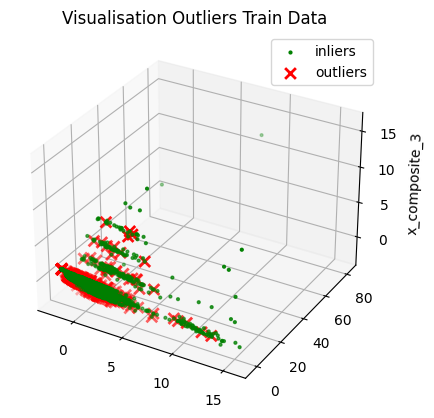

In [21]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(X_train)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index_train,0],X_reduce[outlier_index_train,1], X_reduce[outlier_index_train,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
plt.title('Visualisation Outliers Train Data')
ax.legend()
plt.show()

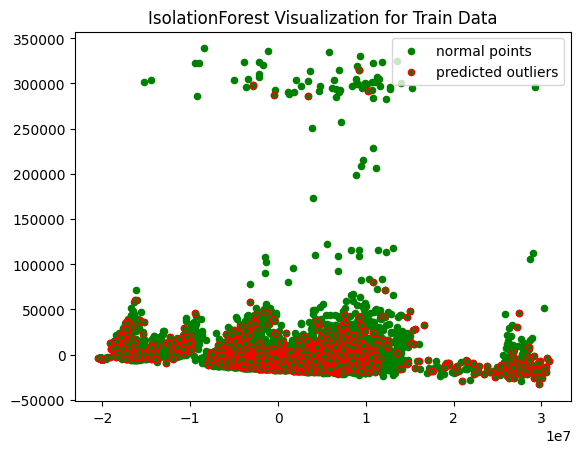

In [22]:
pca = PCA(2)
pca.fit(X_train)
res=pd.DataFrame(pca.transform(X_train))
Z = np.array(res)
plt.title("IsolationForest Visualization for Train Data")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index_train,0],res.iloc[outlier_index_train,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

Fit model on training data and then get predictions for test data

In [5]:
# Call Model fit it with training data and get predictions for Test Data 
model_type='IsolationForest'
IsoForest = load_model(model_type=model_type, X=X_train)
X_test = X_test.copy()
y_predictions_test_data, score_test_data, X_test_with_preds = predict_(IsoForest, X_test)

In [25]:
outliers_test=X_test_with_preds.loc[X_test_with_preds['anomaly']==1]
outlier_index_ts_test=list(outliers_test.index)
outliers_test = outliers_test.reset_index()
outlier_index_test = list(outliers_test.index)
#Find the number of anomalies and normal points here points classified 1 are anomalous
print(X_test_with_preds['anomaly'].value_counts())

0    31537
1     8390
Name: anomaly, dtype: int64


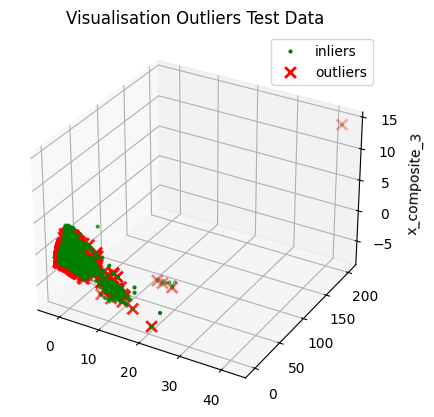

In [26]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(X_test)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index_test,0],X_reduce[outlier_index_test,1], X_reduce[outlier_index_test,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
plt.title('Visualisation Outliers Test Data')
ax.legend()
plt.show()

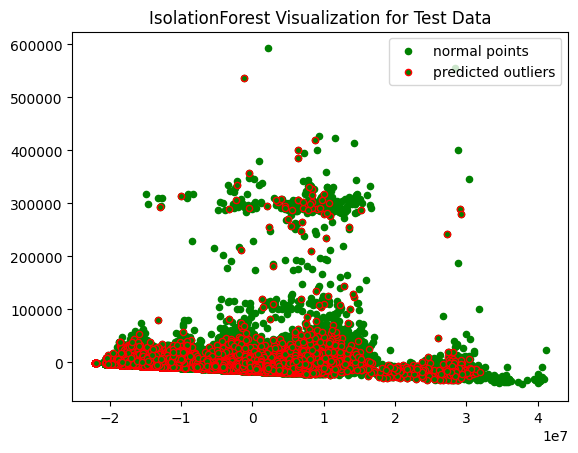

In [9]:
pca = PCA(2)
pca.fit(X_test)
res=pd.DataFrame(pca.transform(X_test))
Z = np.array(res)
plt.title("IsolationForest Visualization for Test Data")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

Fit Model on train data and get predictions for validation data.

In [23]:
model_type='IsolationForest'
IsoForest = load_model(model_type=model_type, X=X_train)
X_validation = X_validation.copy()
y_predictions_validation_data, score_validation_data, X_validation_with_preds = predict_(IsoForest, X_validation)

In [24]:
outliers_validation=X_validation_with_preds.loc[X_validation_with_preds['anomaly']==1]
outlier_index_ts_validation=list(outliers_validation.index)
outliers_validation = outliers_validation.reset_index()
outlier_index_validation = list(outliers_validation.index)
#Find the number of anomalies and normal points here points classified 1 are anomalous
print(X_validation_with_preds['anomaly'].value_counts())

0    2061
1     542
Name: anomaly, dtype: int64


In [ ]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(X_validation)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index_ts_validation,0],X_reduce[outlier_index_validation,1], X_reduce[outlier_index_test,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
plt.title('Visualisation Outliers Test Data')
ax.legend()
plt.show()

# Evaluation 

### Mass Vlume Curve 
### F1 Score

### Cnfusion Matrix

In [13]:
X_test

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,anomaly,score
timestamp,,,,,,,,
2021-12-21 16:29:19.790,0.000556,13762560,872,0,0,0,1,-0.042697
2021-12-21 16:29:20.795,0.000329,13762560,422,0,0,0,1,-0.037206
2021-12-21 16:29:21.802,0.121941,16089088,4671,13851,0,0,0,0.011022
2021-12-21 16:29:22.808,0.021975,17104896,221,0,0,0,1,-0.039368
2021-12-21 16:29:23.815,0.059089,19099648,0,0,0,0,1,-0.040215
...,...,...,...,...,...,...,...,...
2021-09-09 18:17:40.958,0.060553,43999232,2157,7083,0,0,0,0.071958
2021-09-09 18:17:41.962,0.049205,43999232,1568,4742,0,0,0,0.052104
2021-09-09 18:17:42.965,0.019554,43880448,697,2317,0,0,0,0.004536


In [10]:
algorithms = [IsoForest]
name = ['IsolationForest', 'LocalOutlierFactor']
colors = ['red', 'green']

plt.figure(figsize=(12, 6))
for a, algo in enumerate(algorithms):
    algo.fit(X_train)
    algo_train = algo.decision_function(X_train)
    algo_test = algo.decision_function(X_test)
    algo_validation = algo.decision_function(X_validation)

    # as only one class available auc does not work -> Brier Score!
    fpr_train_, tpr_train_, _ = brier_score_loss(y_true_train, )
    algo_auc_train = brier_score_loss(fpr_train_, tpr_train_)
    
    fpr_test_, tpr_test_, _ = roc_curve(y_true_test, -algo_test)
    algo_auc_test = auc(fpr_test_, tpr_test_)

    # as only one class available auc does not work -> Brier Score!
    fpr_validation_, tpr_validation_, _ = roc_curve(y_true_validation, -algo_validation)
    algo_auc_validation = auc(fpr_validation_, tpr_validation_)

    plt.subplot(1, 2, 1)
    plt.title('Performance on Training set')
    plt.plot(fpr_train_, tpr_train_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_train))
    
    plt.subplot(1, 2, 2)
    plt.title('Performance on Test set')
    plt.plot(fpr_test_, tpr_test_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_test))
    
    plt.subplot(1, 2, 1)
    plt.title('Performance on Validation set')
    plt.plot(fpr_validation_, tpr_validation_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_validation))
    
    
plt.subplot(1, 2, 1)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.subplot(1, 2, 2)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.subplot(1, 2, 1)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.show()

TypeError: brier_score_loss() missing 1 required positional argument: 'y_prob'

<Figure size 1200x600 with 0 Axes>